# Lead Scoring Case Study

### Problem Statement

X Education is an education company which sells online courses to industry professionals. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. People who fill up the form providing their email address or phone number are classified as a lead. Some leads even come through referals.

The typical lead conversion rate at X education is around 30%. So now the firm want to identify the most potential leads, also known as ‘Hot Leads’.

So we are to build a model wherein a lead score will be assigned to each of the leads. The customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. We are given leads dataset from the past with around 9000 data points and target variable 'Converted'.

### Step 1: Reading and Understanding the Data

In [1]:
#importing necessary libararies

import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#supressing warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the dataset

leads= pd.read_csv('Leads.csv')

#reading top 5 records

leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
#checking the dimensions of the dataframe

leads.shape

(9240, 37)

So the dataframe has 9240 records and 37 attributes. All these might not be useful for our analysis. So lets try to analyse and understand our dataset further.

In [4]:
#lets see what are the columns provided.

leads.columns

#we then go through the data dictionary to understand the meaning of each of these attributes and possible values in them

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [5]:
#looking at the statistical aspects of the dataframe

leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
#lets look at the datatypes and check if there are any missing values

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Multiple columns seems to have missing values. Hence we would need to clean the data. Also there are around 37 columns hence we would need to understand the valid ones as well.

### Step 2: Data Cleansing and Preparation

In [7]:
leads.isna().sum().sort_values(ascending=False)/leads.shape[0]*100

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

#### Note:

Here more than 50% of the values in Lead Quality are missing
Similaryly 45% of the values in Asymmetrique Activity Index, Asymmetrique Profile Score, Asymmetrique Activity Score, Asymmetrique Profile Index and 36%of the values in Tags columns are also missing

So we take a call here and drop those columns where more than 35% of the values are missing

In [8]:
#creating a list of the columns with more than 35% values missing

col_list=['Lead Quality',  'Asymmetrique Activity Index', 'Asymmetrique Profile Score', 'Asymmetrique Activity Score', 'Asymmetrique Profile Index','Tags']

#dropping those columns from the dataframe

leads.drop(col_list, axis=1, inplace=True)

leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,Select,Mumbai,No,No,Modified


In [9]:
#Lets check the missing values in the dataframe now

leads.isna().sum().sort_values(ascending=False)/leads.shape[0]*100

What matters most to you in choosing a course    29.318182
Lead Profile                                     29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Get updates on DM Content                         0.000000
Newspaper                                         0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.000000
Update me on Supply Chain Content                 0.000000
Receive More Updates About Our Courses            0.0000

In [10]:
#Before making a call lets see what are the different values in each of these columns

cols=leads.columns

for i in cols:
    print(leads[i].value_counts())
    print('-'*50)

7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: Prospect ID, Length: 9240, dtype: int64
--------------------------------------------------
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64
--------------------------------------------------
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
--------------------

#### Here are the findings from the above data:

 * Prospect ID, Lead Number are just unique number assigned to leads and hence won't have any impact on deciding whether they are valuable lead or not. So these are irrelevant to our analysis and can be dropped
 
 
 * Columns --> "Do Not Call", "What matters most to you in choosing a course", "Search", "Magazine", "Newspaper Article", "X Education Forums", "Newspaper", "Digital Advertisement" , "Through Recommendations", "Receive More Updates About Our Courses", "Update me on Supply Chain Content", "Get updates on DM Content", "I agree to pay the amount through cheque" have very high data imbalance and hence has no impact on our analysis.
 
* We hence decide to drop the above columns as well


* There are few columns with value as "Select". This includes columns --> "Specialization", "How did you hear about X Education","Lead Profile", "City" and needs to be handled similar to missing values

In [11]:
#dropping the id columns --> Prospect ID, Lead Number

leads.drop(['Prospect ID','Lead Number'], axis=1, inplace=True)

leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,No,No,No,Select,Select,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,No,No,Select,Select,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,No,No,No,Select,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,No,No,No,Select,Mumbai,No,No,Modified


In [12]:
#dropping the high data imbalanced columns

col_list=[ "Do Not Call", "What matters most to you in choosing a course", "Search", "Magazine", "Newspaper Article", "X Education Forums", "Newspaper", "Digital Advertisement" , "Through Recommendations", "Receive More Updates About Our Courses", "Update me on Supply Chain Content", "Get updates on DM Content", "I agree to pay the amount through cheque" ]

leads.drop(col_list, axis=1, inplace=True)

leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Select,Select,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Select,Select,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Potential Lead,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Select,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Select,Mumbai,No,Modified


In [13]:
leads.shape

(9240, 16)

In [14]:
#Handling the columns with "Select"

#This includes columns --> "Specialization", "How did you hear about X Education","Lead Profile", "City" 

leads["How did you hear about X Education"].value_counts()/leads.shape[0]*100

Select                   54.577922
Online Search             8.744589
Word Of Mouth             3.766234
Student of SomeSchool     3.354978
Other                     2.012987
Multiple Sources          1.645022
Advertisements            0.757576
Social Media              0.725108
Email                     0.281385
SMS                       0.248918
Name: How did you hear about X Education, dtype: float64

Here above 50% of the values in "How did you hear about X Education" is "Select", which means is missing. Hence this column doesn't seem to part enough information and hence is better to be dropped.

In [15]:
leads["Lead Profile"].value_counts()/leads.shape[0]*100

Select                         44.870130
Potential Lead                 17.456710
Other Leads                     5.270563
Student of SomeSchool           2.608225
Lateral Student                 0.259740
Dual Specialization Student     0.216450
Name: Lead Profile, dtype: float64

Similar is the case with "Lead Profile". Around 44% of the information is missing. We hence take a call to drop this attribute as well.

In [16]:
#Dropping columns --> "How did you hear about X Education" and "Lead Profile"

leads.drop(["How did you hear about X Education", "Lead Profile"], axis=1, inplace=True)

leads.shape

(9240, 14)

In [17]:
leads["City"].value_counts()/leads.shape[0]*100

Mumbai                         34.870130
Select                         24.339827
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

In [18]:
leads["Specialization"].value_counts()/leads.shape[0]*100

Select                               21.017316
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

Here unlike "How did you hear about X Education" and "Lead Profile", "Specialization" seems to contain more information. Lets analyse the missing values of the dataframe once again.

In [19]:
#checking missing values

leads.isna().sum().sort_values(ascending=False)

What is your current occupation           2690
Country                                   2461
Specialization                            1438
City                                      1420
TotalVisits                                137
Page Views Per Visit                       137
Last Activity                              103
Lead Source                                 36
Lead Origin                                  0
Do Not Email                                 0
Converted                                    0
Total Time Spent on Website                  0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [20]:
#Country column

leads.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [21]:
leads.City.value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

#### Note:

There seems to exist a data imbalance in "Country" column as well with 6492 values being India and 2461 missing, out of 9240 records. Similar is the case with "City" column, 3222 values are Mumbai, 2249 are Select (to be considered missing) and 1420 missing values.

But most importantly, as per the understanding, the country or city of a person doesn't seem to be a deciding factor whether or not they will be a hot lead. Hence as per our analysis and understanding gained, we decide to drop these columns as well

In [22]:
#Dropping Country and City attributes

leads.drop(["Country", "City"], axis=1, inplace=True)

leads.shape

(9240, 12)

In [23]:
#checking missing value counts again

leads.isna().sum().sort_values(ascending=False)/leads.shape[0]*100

What is your current occupation           29.112554
Specialization                            15.562771
TotalVisits                                1.482684
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Lead Source                                0.389610
Lead Origin                                0.000000
Do Not Email                               0.000000
Converted                                  0.000000
Total Time Spent on Website                0.000000
A free copy of Mastering The Interview     0.000000
Last Notable Activity                      0.000000
dtype: float64

Around 29% values in What is your current occupation is null. It is better to drop those rows with missing values.

In [24]:
#removing rows where What is your current occupation is missing

leads= leads[~leads["What is your current occupation"].isna()]

In [25]:
leads.shape

(6550, 12)

In [26]:
#Lets see how many values are missing now

leads.isna().sum().sort_values(ascending=False)/leads.shape[0]*100

TotalVisits                               1.984733
Page Views Per Visit                      1.984733
Last Activity                             1.572519
Lead Source                               0.549618
Specialization                            0.274809
Lead Origin                               0.000000
Do Not Email                              0.000000
Converted                                 0.000000
Total Time Spent on Website               0.000000
What is your current occupation           0.000000
A free copy of Mastering The Interview    0.000000
Last Notable Activity                     0.000000
dtype: float64

In [27]:
#Similarly let us remove the records with missing values from TotalVisits

leads=leads[~leads["TotalVisits"].isna()]  

In [28]:
leads.shape

(6420, 12)

In [29]:
#Checking the missing value counts

leads.isna().sum().sort_values(ascending=False)/leads.shape[0]*100

Lead Source                               0.451713
Specialization                            0.280374
Lead Origin                               0.000000
Do Not Email                              0.000000
Converted                                 0.000000
TotalVisits                               0.000000
Total Time Spent on Website               0.000000
Page Views Per Visit                      0.000000
Last Activity                             0.000000
What is your current occupation           0.000000
A free copy of Mastering The Interview    0.000000
Last Notable Activity                     0.000000
dtype: float64

In [30]:
#Dropping missing value records from TotalVisits seems to have eliminated missing value records from 
#Page Views Per Visit and Last Activity columns as well

#Following similar process for Lead source

leads=leads[~leads["Lead Source"].isna()]

leads.shape

(6391, 12)

In [31]:
#Checking the missing value counts

leads.isna().sum().sort_values(ascending=False)/leads.shape[0]*100

Specialization                            0.281646
Lead Origin                               0.000000
Lead Source                               0.000000
Do Not Email                              0.000000
Converted                                 0.000000
TotalVisits                               0.000000
Total Time Spent on Website               0.000000
Page Views Per Visit                      0.000000
Last Activity                             0.000000
What is your current occupation           0.000000
A free copy of Mastering The Interview    0.000000
Last Notable Activity                     0.000000
dtype: float64

In [32]:
#Dropping missing value records from Specialization

leads=leads[~leads["Specialization"].isna()]

leads.shape

(6373, 12)

In [33]:
#Checking the missing value counts once again

leads.isna().sum().sort_values(ascending=False)/leads.shape[0]*100

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

Now we have eliminated all the missing values from the table. **But it is to be kept in mind that we are yet to handle "Select" scenario.** Also since we have dropped couple of rows, lets see what percentage of rows have we retained by the end of data cleaning process.

In [34]:
#Percentage of rows available for model preparation

#Initial row count was 9240

print(leads.shape[0]/9240*100)

68.97186147186147


This means that we have retained around 69% of the records from the given dataset.

In [35]:
#Lets have a quick look at the data

leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


### Dummy Variable Creation

We will be creating dummy variables for the categorical columns

In [36]:
#Listing out the categorical columns

leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6373 non-null   object 
 1   Lead Source                             6373 non-null   object 
 2   Do Not Email                            6373 non-null   object 
 3   Converted                               6373 non-null   int64  
 4   TotalVisits                             6373 non-null   float64
 5   Total Time Spent on Website             6373 non-null   int64  
 6   Page Views Per Visit                    6373 non-null   float64
 7   Last Activity                           6373 non-null   object 
 8   Specialization                          6373 non-null   object 
 9   What is your current occupation         6373 non-null   object 
 10  A free copy of Mastering The Interview  6373 non-null   obje

In [37]:
#listing the categorical columns

leads.select_dtypes(include='object').columns


Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [38]:
#creating dummy variables for all except 'Specialization', since we need to handle the Select value in the column

cat_cols=['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation',
          'A free copy of Mastering The Interview', 'Last Notable Activity']

dummy1=pd.get_dummies(leads[cat_cols], drop_first=True)

dummy1

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9234,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9235,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [39]:
leads.shape

(6373, 12)

In [40]:
#merging dummy1 with leads dataset


leads=pd.concat([leads, dummy1], axis=1 )

leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,...,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,...,1,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,1,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,...,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,...,0,0,0,1,0,0,0,0,0,0


In [41]:
#creating dummy variable for 'Specialization' and handling 'Select' values without dropping first column

dummy2=pd.get_dummies(leads['Specialization'], prefix='Specialization')

dummy2.head()

,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [42]:
dummy2.shape

(6373, 19)

In [43]:
#Out of all the dummies created we delete the dummy created for Selected since it is indeed missing value from the column

dummy2.drop('Specialization_Select', axis=1, inplace=True)

dummy2.head()

,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [44]:
dummy2.shape

(6373, 18)

In [45]:
#We now concat dummy2 dataset with leads dataset

leads= pd.concat([leads, dummy2], axis=1)

leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,...,0,0,0,0,0,0,0,0,0,0
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,...,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,...,0,0,0,0,0,0,0,0,0,0


In [46]:
#we now delete the categorical columns from the dataset since the dummy variables are created

leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'], axis=1, inplace=True)


#lets look at our new dataset

leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Step 3: Train -Test Split

To proceed further we would need to split our dataset into train and test set. This is mostly done in the ratio 80-20 or 70-30 etc.

In [47]:
#import the required libraries

from sklearn.model_selection import train_test_split

Before train-test split, we separate our data into feature variables or the independent variables and the target variable or the dependent variable

In [48]:
#creating the feature set, X

X= leads.drop('Converted', axis=1)

#note that we haven't used inplace=True, hence the leads dataset wouldn't be altered

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
#creating the target dataset

y= leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [50]:
#splitting data into train and test set

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=100)

In [51]:
#Lets check the dimension of the datasets

print('X_train', X_train.shape)
print('X_test',X_test.shape)

print('y_train', y_train.shape)
print('y_test', y_test.shape)

X_train (4461, 74)
X_test (1912, 74)
y_train (4461,)
y_test (1912,)


### Step 4: Feature Scaling

To compare the coefficents of the various features, the value ranges in each of the feature should be in a similar range. To achieve this we scale the numeric variables. Note that we fit and transform on train set but only transform the scaler on the test set

In [52]:
#import the required libarary

from sklearn.preprocessing import MinMaxScaler


#MinMaxScaler scales the values in a column between 0 and 1

In [53]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,4.0,67,2.0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
218,4.0,187,4.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4171,6.0,78,6.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4037,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3660,0.0,0,0.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
#We will be scaling the three numerical variables -- "TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"

scaler = MinMaxScaler()

X_train[["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]]= scaler.fit_transform(X_train[["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]])

X_train.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
count,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,...,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000
mean,0.014528,0.234426,0.153604,0.564672,0.094149,0.003587,0.290069,0.003587,0.320108,0.000448,...,0.044385,0.023089,0.104237,0.023313,0.058507,0.014571,0.008742,0.002690,0.040126,0.022192
std,0.021712,0.248618,0.127910,0.495856,0.292069,0.059788,0.453845,0.059788,0.466570,0.021171,...,0.205971,0.150203,0.305602,0.150913,0.234726,0.119840,0.093102,0.051801,0.196276,0.147325
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.003984,0.014525,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.011952,0.125440,0.125000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.019920,0.448504,0.229375,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Note that the min, max values of "TotalVisits", "Total Time Spent on Website", "Page Views Per Visit" are 0 and 1 respectively.

In [55]:
#Scaling the test set --> only transform

X_test[["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]]= scaler.transform(X_test[["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]])


X_test.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
count,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.0,...,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000
mean,0.014232,0.238254,0.158354,0.578452,0.084205,0.005753,0.302824,0.006276,0.324268,0.0,...,0.041841,0.017259,0.103556,0.029812,0.067992,0.006799,0.009937,0.006799,0.050209,0.026151
std,0.015770,0.249417,0.151606,0.493936,0.277768,0.075651,0.459600,0.078994,0.468223,0.0,...,0.200278,0.130270,0.304764,0.170112,0.251797,0.082198,0.099215,0.082198,0.218434,0.159625
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.007968,0.016285,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.011952,0.128961,0.125000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.019920,0.453455,0.218750,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.294821,0.991637,3.437500,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Note that here min, max values of "TotalVisits", "Total Time Spent on Website", "Page Views Per Visit" need not be 0 and 1. This is because the data is fitted on the train set. The transform is only applied on the test set.

In [56]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,0.015936,0.029489,0.125,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
218,0.015936,0.082306,0.250,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4171,0.023904,0.034331,0.375,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4037,0.000000,0.000000,0.000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3660,0.000000,0.000000,0.000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Looking at correlations 

In [57]:
#Lets look at the correlation matrix

X_train.corr()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
TotalVisits,1.000000,0.180396,0.435633,0.253439,-0.201371,-0.040149,0.069662,-0.040149,0.079346,-0.014172,...,0.018576,0.029421,-0.005065,0.041375,0.013192,0.004456,0.076798,0.026402,0.081599,0.053059
Total Time Spent on Website,0.180396,1.000000,0.317382,0.271853,-0.254398,-0.056578,0.112708,-0.056578,0.232249,-0.019972,...,0.020717,0.013033,0.054701,0.050156,0.054325,0.032314,0.017783,0.013438,0.036675,0.034180
Page Views Per Visit,0.435633,0.317382,1.000000,0.481898,-0.367005,-0.072056,0.103034,-0.072056,0.206739,-0.025436,...,0.063053,0.064399,0.029195,0.077295,0.040201,0.023451,0.027137,0.029267,0.052635,0.101226
Lead Origin_Landing Page Submission,0.253439,0.271853,0.481898,1.000000,-0.367172,-0.068330,0.504456,-0.068330,0.077192,-0.024120,...,0.143126,0.089828,0.087931,0.096703,0.093663,0.072809,0.053317,0.045601,0.108103,0.089308
Lead Origin_Lead Add Form,-0.201371,-0.254398,-0.367005,-0.367172,1.000000,-0.019342,-0.206074,-0.019342,-0.219566,0.065693,...,-0.043389,-0.039341,0.013114,-0.044722,-0.031309,-0.026390,-0.030276,-0.016743,-0.030714,-0.043358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Specialization_Retail Management,0.004456,0.032314,0.023451,0.072809,-0.026390,-0.007295,0.021212,-0.007295,0.020824,-0.002575,...,-0.026206,-0.018694,-0.041480,-0.018787,-0.030313,1.000000,-0.011420,-0.006315,-0.024862,-0.018319
Specialization_Rural and Agribusiness,0.076798,0.017783,0.027137,0.053317,-0.030276,-0.005634,0.035485,-0.005634,-0.033469,-0.001989,...,-0.020239,-0.014438,-0.032036,-0.014509,-0.023411,-0.011420,1.000000,-0.004877,-0.019201,-0.014148
Specialization_Services Excellence,0.026402,0.013438,0.029267,0.045601,-0.016743,-0.003116,0.043100,-0.003116,-0.026359,-0.001100,...,-0.011193,-0.007984,-0.017716,-0.008024,-0.012947,-0.006315,-0.004877,1.000000,-0.010618,-0.007824
Specialization_Supply Chain Management,0.081599,0.036675,0.052635,0.108103,-0.030714,0.006840,0.078224,0.006840,-0.015423,-0.004330,...,-0.044063,-0.031432,-0.069746,-0.031588,-0.050968,-0.024862,-0.019201,-0.010618,1.000000,-0.030802


The number of attributes are very high that figuring out the correlations from the above table manually is not very feasible

### Step 5: Model Building

As mentioned before, finding the correlations among this big a dataset isn't easy hence we would be going to be using RFE for the feature selection. We would then evaluate the models created using the RFE selected features and make decisons based on that.

### Feature Selection using RFE

In [58]:
#import the required libraries

from sklearn.linear_model import LogisticRegression


#creating logistic regression object

logreg= LogisticRegression()

In [59]:
#import libraries for RFE

from sklearn.feature_selection import RFE


#running RFE with 15 variables as output

rfe= RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [60]:
rfe.support_  #shows position wise which are the attributes selected

array([ True,  True, False, False,  True, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False,  True, False,  True,  True,  True, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [61]:
#we can get a clear picture from the below output about the selected features

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 23),
 ('Lead Origin_Landing Page Submission', False, 8),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 52),
 ('Lead Source_Direct Traffic', False, 24),
 ('Lead Source_Facebook', False, 51),
 ('Lead Source_Google', False, 36),
 ('Lead Source_Live Chat', False, 44),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 35),
 ('Lead Source_Pay per Click Ads', False, 43),
 ('Lead Source_Press_Release', False, 53),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 37),
 ('Lead Source_Social Media', False, 58),
 ('Lead Source_WeLearn', False, 42),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 33),
 ('Lead Source_testone', False, 38),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 25),
 ('Last Activity_Email Bounced', False, 4),
 ('Last Activity_Email Link C

In [62]:
# creating a list of selected columns

cols = X_train.columns[rfe.support_]

cols  #list of 15 selected features

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

#### Model 1

Let us now create a model using all the 15 selected features using statsmodel

In [63]:
#import statsmodel

import statsmodels.api as sm

In [64]:
#while using statsmodel, we need to add constant to our X_train

X_train_sm = sm.add_constant(X_train[cols])

#note that here X_train_sm contains only the selected features


In [65]:
X_train_sm.head()

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
8003,1.0,0.015936,0.029489,0,0,0,0,0,0,1,0,0,1,0,0,0
218,1.0,0.015936,0.082306,0,0,0,0,0,0,0,0,0,1,0,0,0
4171,1.0,0.023904,0.034331,0,0,0,0,0,0,0,0,0,1,0,0,0
4037,1.0,0.000000,0.000000,0,1,0,0,0,0,0,0,0,1,0,0,0
3660,1.0,0.000000,0.000000,1,0,1,0,0,0,1,0,0,1,0,0,0


In [66]:
#fitting a logistic Regression model on X_train and getting summary

logm1= sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2072.8
Date:                Mon, 02 Jan 2023   Deviance:                       4145.5
Time:                        02:01:54   Pearson chi2:                 4.84e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3660
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0061      0.600     -1.677      0.094      -2.182       0.170
TotalVisits                                             11.3439      2.682      4.230      0.000       6.088      16.600
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
Lead Origin_Lead Add Form                                2.9483      1.191      2.475      0.013       0.614       5.283
Lead Source_Olark Chat                                   1.4584      0.122     11.962      0.000       1.219       1.697
Lead Source_Reference                                    1.2994      1.214      1.070      0.285      -1.080       3.679
Lead Source_Welingak Website                             3.4159      1.558      2.192      0.028       0.362       6.470
Do Not Email_Yes                                        -1.5053      0.193     -7.781      0.000      -1.884      -1.126
Last Activity_Had a Phone Conversation                   1.0397      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6492   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1544      0.630     -1.831      0.067      -2.390       0.081
What is your current occupation_Unemployed              -1.3395      0.594     -2.254      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1932   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7868      0.807      3.453      0.001       1.205       4.369
========================================================================================================================
"""

Checking the p values here, we can see that there are quite high values (greater than optimum value of 0.05). Before taking a call on which feature to drop, lets have a look at VIF

In [67]:
# import variance inflation factor

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [68]:
#train set with only selected features but not constant

X_train_rfe = X_train[cols]

In [69]:
#creating a vif data for each of the feature

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,84.19
4,Lead Source_Reference,65.18
5,Lead Source_Welingak Website,20.03
11,What is your current occupation_Unemployed,3.65
7,Last Activity_Had a Phone Conversation,2.44
13,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.38
0,TotalVisits,1.62
8,Last Activity_SMS Sent,1.59
12,What is your current occupation_Working Profes...,1.56


The VIF values are pretty high for Lead Origin_Lead Add Form, Lead Source_Reference and Lead Source_Welingak Website

As a normally followed method, if there are features with high p value and high vif those should be dropped first.Hence we will be going with dropping Lead Source_Reference since it has a high p and high vif

In [70]:
#dropping Lead Source_Reference

X_train_sm.drop('Lead Source_Reference', axis=1, inplace=True)

In [71]:
X_train_sm.head()

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
8003,1.0,0.015936,0.029489,0,0,0,0,0,1,0,0,1,0,0,0
218,1.0,0.015936,0.082306,0,0,0,0,0,0,0,0,1,0,0,0
4171,1.0,0.023904,0.034331,0,0,0,0,0,0,0,0,1,0,0,0
4037,1.0,0.000000,0.000000,0,1,0,0,0,0,0,0,1,0,0,0
3660,1.0,0.000000,0.000000,1,0,0,0,0,1,0,0,1,0,0,0


In [72]:
X_train_sm.shape #now we have come down to 14 features

(4461, 15)

#### Model 2

Lets build a new model with refined set of features

In [73]:
#fitting a logistic Regression model on X_train and getting summary

logm2= sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2073.2
Date:                Mon, 02 Jan 2023   Deviance:                       4146.5
Time:                        02:03:28   Pearson chi2:                 4.82e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3658
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0057      0.600     -1.677      0.094      -2.181       0.170
TotalVisits                                             11.3428      2.682      4.229      0.000       6.086      16.599
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
Lead Origin_Lead Add Form                                4.2084      0.259     16.277      0.000       3.702       4.715
Lead Source_Olark Chat                                   1.4583      0.122     11.960      0.000       1.219       1.697
Lead Source_Welingak Website                             2.1557      1.037      2.079      0.038       0.124       4.188
Do Not Email_Yes                                        -1.5036      0.193     -7.779      0.000      -1.882      -1.125
Last Activity_Had a Phone Conversation                   1.0398      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6511   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1537      0.630     -1.830      0.067      -2.389       0.082
What is your current occupation_Unemployed              -1.3401      0.594     -2.255      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2748      0.623      2.046      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1934   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7872      0.807      3.454      0.001       1.205       4.369
========================================================================================================================
"""

Last Activity_Had a Phone Conversation, What is your current occupation_Housewife, Last Notable Activity_Had a Phone Conversation, What is your current occupation_Student seems to have higher p values

In [74]:
#Lets check the vif

X_train_rfe.drop('Lead Source_Reference', axis=1, inplace=True)

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,3.65
6,Last Activity_Had a Phone Conversation,2.44
12,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.38
2,Lead Origin_Lead Add Form,1.71
0,TotalVisits,1.62
7,Last Activity_SMS Sent,1.59
11,What is your current occupation_Working Profes...,1.56
3,Lead Source_Olark Chat,1.44
4,Lead Source_Welingak Website,1.33


The vif values are in the optimal range. Hence we go ahead and drop the feature with highest p value, i.e., "Last Notable Activity_Had a Phone Conversation"

In [76]:
X_train_sm.drop("Last Notable Activity_Had a Phone Conversation", axis=1, inplace=True)

X_train_rfe.drop("Last Notable Activity_Had a Phone Conversation", axis=1, inplace=True)

In [78]:
X_train_sm.head()

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Unreachable
8003,1.0,0.015936,0.029489,0,0,0,0,0,1,0,0,1,0,0
218,1.0,0.015936,0.082306,0,0,0,0,0,0,0,0,1,0,0
4171,1.0,0.023904,0.034331,0,0,0,0,0,0,0,0,1,0,0
4037,1.0,0.000000,0.000000,0,1,0,0,0,0,0,0,1,0,0
3660,1.0,0.000000,0.000000,1,0,0,0,0,1,0,0,1,0,0


In [79]:
X_train_sm.shape # we have come to 13 features

(4461, 14)

#### Model 3

Let us build a new model with the 13 features and check its summary

In [80]:
#fitting a logistic Regression model on X_train and getting summary

logm3= sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2076.1
Date:                Mon, 02 Jan 2023   Deviance:                       4152.2
Time:                        02:13:28   Pearson chi2:                 4.82e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3650
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0069      0.600     -1.679      0.093      -2.182       0.168
TotalVisits                                             11.4551      2.686      4.265      0.000       6.191      16.720
Total Time Spent on Website                              4.4237      0.185     23.900      0.000       4.061       4.787
Lead Origin_Lead Add Form                                4.2082      0.259     16.276      0.000       3.701       4.715
Lead Source_Olark Chat                                   1.4581      0.122     11.958      0.000       1.219       1.697
Lead Source_Welingak Website                             2.1557      1.037      2.079      0.038       0.124       4.188
Do Not Email_Yes                                        -1.5037      0.193     -7.780      0.000      -1.882      -1.125
Last Activity_Had a Phone Conversation                   2.7502      0.802      3.430      0.001       1.179       4.322
Last Activity_SMS Sent                                   1.1826      0.082     14.364      0.000       1.021       1.344
What is your current occupation_Housewife               21.6525   1.49e+04      0.001      0.999   -2.91e+04    2.91e+04
What is your current occupation_Student                 -1.1520      0.630     -1.828      0.068      -2.387       0.083
What is your current occupation_Unemployed              -1.3385      0.594     -2.253      0.024      -2.503      -0.174
What is your current occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.495
Last Notable Activity_Unreachable                        2.7862      0.807      3.453      0.001       1.205       4.368
========================================================================================================================
"""

Feature, What is your current occupation_Housewife still has high p value

In [81]:
#Lets check the vif

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,3.65
1,Total Time Spent on Website,2.38
2,Lead Origin_Lead Add Form,1.71
0,TotalVisits,1.62
7,Last Activity_SMS Sent,1.59
11,What is your current occupation_Working Profes...,1.56
3,Lead Source_Olark Chat,1.44
4,Lead Source_Welingak Website,1.33
5,Do Not Email_Yes,1.09
9,What is your current occupation_Student,1.09


VIF values looks descent. Hence we go ahead and drop high p value attribute --> What is your current occupation_Housewife

In [82]:
X_train_sm.drop("What is your current occupation_Housewife", axis=1, inplace=True)

X_train_rfe.drop("What is your current occupation_Housewife", axis=1, inplace=True)

In [84]:
X_train_sm.shape # we have come to 12 features

(4461, 13)

#### Model 4

Let us build a new model with the selected 12 features and check the summary

In [85]:
logm4= sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2078.3
Date:                Mon, 02 Jan 2023   Deviance:                       4156.7
Time:                        02:17:34   Pearson chi2:                 4.83e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3644
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4528      0.554     -0.818      0.413      -1.538       0.632
TotalVisits                                             11.2586      2.672      4.214      0.000       6.023      16.495
Total Time Spent on Website                              4.4217      0.185     23.898      0.000       4.059       4.784
Lead Origin_Lead Add Form                                4.2057      0.258     16.274      0.000       3.699       4.712
Lead Source_Olark Chat                                   1.4530      0.122     11.930      0.000       1.214       1.692
Lead Source_Welingak Website                             2.1541      1.037      2.078      0.038       0.122       4.186
Do Not Email_Yes                                        -1.5063      0.193     -7.785      0.000      -1.886      -1.127
Last Activity_Had a Phone Conversation                   2.7515      0.802      3.432      0.001       1.180       4.323
Last Activity_SMS Sent                                   1.1823      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Student                 -1.7017      0.588     -2.893      0.004      -2.855      -0.549
What is your current occupation_Unemployed              -1.8879      0.550     -3.435      0.001      -2.965      -0.811
What is your current occupation_Working Professional     0.7246      0.581      1.248      0.212      -0.413       1.862
Last Notable Activity_Unreachable                        2.7834      0.807      3.448      0.001       1.201       4.365
========================================================================================================================
"""

Here "What is your current occupation_Working Professional" seems to have a high p value. The features have descent p values. Lets check the VIF before making a decision

In [86]:
#Lets check the vif

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,3.64
1,Total Time Spent on Website,2.37
2,Lead Origin_Lead Add Form,1.70
0,TotalVisits,1.62
7,Last Activity_SMS Sent,1.59
10,What is your current occupation_Working Profes...,1.56
3,Lead Source_Olark Chat,1.44
4,Lead Source_Welingak Website,1.33
5,Do Not Email_Yes,1.09
8,What is your current occupation_Student,1.09


In [87]:
#Let us drop the feature "What is your current occupation_Working Professional"

X_train_sm.drop("What is your current occupation_Working Professional", axis=1, inplace=True)

X_train_rfe.drop("What is your current occupation_Working Professional", axis=1, inplace=True)

In [89]:
X_train_sm.shape  #11 selected features

(4461, 12)

#### Model 5

Model 5 using the 11 selected features

In [90]:
logm5= sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2079.1
Date:                Mon, 02 Jan 2023   Deviance:                       4158.1
Time:                        02:21:10   Pearson chi2:                 4.80e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3642
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.2040      0.196      1.043      0.297      -0.179       0.587
TotalVisits                                   11.1489      2.665      4.184      0.000       5.926      16.371
Total Time Spent on Website                    4.4223      0.185     23.899      0.000       4.060       4.785
Lead Origin_Lead Add Form                      4.2051      0.258     16.275      0.000       3.699       4.712
Lead Source_Olark Chat                         1.4526      0.122     11.934      0.000       1.214       1.691
Lead Source_Welingak Website                   2.1526      1.037      2.076      0.038       0.121       4.185
Do Not Email_Yes                              -1.5037      0.193     -7.774      0.000      -1.883      -1.125
Last Activity_Had a Phone Conversation         2.7552      0.802      3.438      0.001       1.184       4.326
Last Activity_SMS Sent                         1.1856      0.082     14.421      0.000       1.024       1.347
What is your current occupation_Student       -2.3578      0.281     -8.392      0.000      -2.908      -1.807
What is your current occupation_Unemployed    -2.5445      0.186    -13.699      0.000      -2.908      -2.180
Last Notable Activity_Unreachable              2.7846      0.807      3.449      0.001       1.202       4.367
==============================================================================================================
"""

The p values are now in the optimal range. Lets validate the VIF

In [91]:
#Lets check the vif

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,2.82
1,Total Time Spent on Website,2.00
0,TotalVisits,1.54
7,Last Activity_SMS Sent,1.51
2,Lead Origin_Lead Add Form,1.45
3,Lead Source_Olark Chat,1.33
4,Lead Source_Welingak Website,1.30
5,Do Not Email_Yes,1.08
8,What is your current occupation_Student,1.06
6,Last Activity_Had a Phone Conversation,1.01


The VIF values are also in the optimal range. Hence we can say that this model with 11 features could be finalised. 
But we need to test the effectiveness of the model which will be done during model evaluation.

### Step 6. Model Evaluation

In [93]:
#Let us use our final X_train data set to generate the predicted target variable

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8003    0.300117
218     0.142002
4171    0.127629
4037    0.291558
3660    0.954795
207     0.194426
2044    0.178073
6411    0.949460
6498    0.075995
2085    0.982316
dtype: float64

In [94]:
#we need to reshape this into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.30011695, 0.14200165, 0.12762885, 0.29155814, 0.95479546,
       0.19442563, 0.17807328, 0.94946006, 0.07599465, 0.98231619])

#### Creating a dataframe with the actual converted flag and the predicted probabilities

In [95]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})

y_train_pred_final.head()

,Converted,Converted_Prob
0,0,0.300117
1,0,0.142002
2,1,0.127629
3,1,0.291558
4,1,0.954795


In [97]:
#creating a new flag "Predicted" as 1 when "Converted_Prob">0.5 otherwise 0

y_train_pred_final["Predicted"] =  y_train_pred_final.Converted_Prob.map(lambda x:1 if x>0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Predicted
0,0,0.300117,0
1,0,0.142002,0
2,1,0.127629,0
3,1,0.291558,0
4,1,0.954795,1


Now that we have the target variable, the probability score and the prediction as per our selected features.
Let us evaluate the model

In [99]:
#import necessary libraries

from sklearn import metrics

In [100]:
#creating confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1929  383]
 [ 560 1589]]


In [101]:
# Predicted      Not Converted   Converted
# Actual
# Not converted        1929      383
# Converted            560       1589  

In [102]:
# Calculating the overall Accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7886124187401928


78.86% seems to be a decent value for accuracy 

Let us evaluate the other metrices as well. But before that let us assign the true positives, true negatives, false positives and false negatives

In [104]:
TN = confusion[0][0] #true negative  
FP = confusion[0][1] #false positive
TP = confusion[1][1] #true positive
FN = confusion[1][0] #false negative

In [106]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.739413680781759

In [107]:
# Let us calculate specificity

TN / float(TN+FP)

0.8343425605536332

The values of sensitivity and specificity also looks decent.

In [108]:
# Calculate false postive rate - predicting as converted when customer is not converted
print(FP/ float(TN+FP))

0.1656574394463668


In [109]:
# positive predictive value 
print (TP / float(TP+FP))

0.8057809330628803


In [110]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7750100441944556


The negative  predictive value and positive predictive value are in a comparable range.

### Step 7. Plotting the ROC Curve


An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [111]:
#creating a function to draw the roc curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

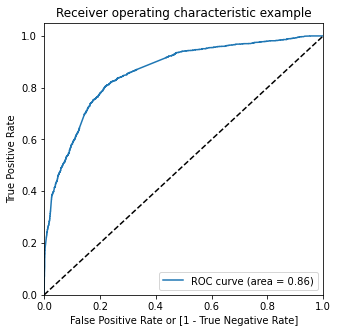

In [113]:
#calling the roc function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

Here, the curve follows the left-hand border closely and then the top border of the ROC space and is away from the diagonal, implying that the model creating is good. Also note that the area under the curve is 0.86 which good enough value for a model

### Step 8: Finding Optimal Cutoff Point

The value of threshold value of 0.5 has been taken just as an arbitrary value. If so, what is the optimal value?

To identify the cutoff, we need to find a tradeoff between sensitivity and specificity

In [114]:
# Let's create columns with different probability cutoffs 

num = [float(x)/10 for x in range(10)]
for i in num:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.300117,0,1,1,1,1,0,0,0,0,0,0
1,0,0.142002,0,1,1,0,0,0,0,0,0,0,0
2,1,0.127629,0,1,1,0,0,0,0,0,0,0,0
3,1,0.291558,0,1,1,1,0,0,0,0,0,0,0
4,1,0.954795,1,1,1,1,1,1,1,1,1,1,1


In [118]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    
    total1=sum(sum(cm1))
    
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.527012  0.994416  0.092561
0.2   0.2  0.698274  0.944160  0.469723
0.3   0.3  0.767541  0.865984  0.676038
0.4   0.4  0.791975  0.810610  0.774654
0.5   0.5  0.788612  0.739414  0.834343
0.6   0.6  0.757229  0.624011  0.881055
0.7   0.7  0.735037  0.543509  0.913062
0.8   0.8  0.711500  0.453234  0.951557
0.9   0.9  0.644026  0.279665  0.982699


Accuracy has its highest value at 0.4 cutoff. 

As we know as sensitivity increases, the specifity descrease. But it is interesting to note that at cutoff of 0.4, these metrices has also good enough values. To get even clear picture let us plot these metrices.

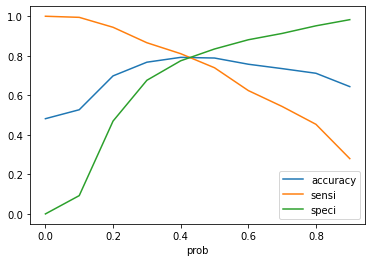

In [125]:
#plotting  accuracy, sensitivity and specificity for various probability cutoffs.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the above curve we can say that at around 0.42 we get the optimal for all the three metrices, sensitivity specificity and accuracy. Hence lets now set our threshold value as 0.42

### Evaluation of the model with new cutoff

In [126]:
#lets check the prediction dataset

y_train_pred_final.head()

,Converted,Converted_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.300117,0,1,1,1,1,0,0,0,0,0,0
1,0,0.142002,0,1,1,0,0,0,0,0,0,0,0
2,1,0.127629,0,1,1,0,0,0,0,0,0,0,0
3,1,0.291558,0,1,1,1,0,0,0,0,0,0,0
4,1,0.954795,1,1,1,1,1,1,1,1,1,1,1


In [127]:
#add a new prediction column based on new cutoff

y_train_pred_final["Prediction_new"]=y_train_pred_final.Converted_Prob.map(lambda x:1 if x>0.42 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Prediction_new
0,0,0.300117,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.142002,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.127629,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.291558,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.954795,1,1,1,1,1,1,1,1,1,1,1,1


In [128]:
#let us create our new confusion matrix

conf_new=metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Prediction_new)

conf_new

array([[1823,  489],
       [ 444, 1705]], dtype=int64)

In [129]:
#Let us assess the accuracy with the new threshold

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Prediction_new)

0.7908540685944856

We can see that there is a slight improvement in accuracy from 0.788 to 0.79

In [130]:
#Let us check the sensitivity and specificity as well

#Before that let us assign the values of confusion matrix

TP = conf_new[1,1] # true positive 
TN = conf_new[0,0] # true negatives
FP = conf_new[0,1] # false positives
FN = conf_new[1,0] # false negatives


In [131]:
# Let's see the sensitivity 
TP / float(TP+FN)

0.793392275476966

Sensitivity increased from 0.739 to 0.793

In [132]:
# Let us calculate specificity
TN / float(TN+FP)

0.7884948096885813

Specificity reduced from 0.834 to 0.788, but is still at a good range. Also with this cutoff all three metrices are at a optimum value range and hence this is a good threshold point

### Step 9. Precision and Recall

In [136]:
#Lets calculate the precison and recall values from the confusion matrix with 0.5 as cutoff

confusion

array([[1929,  383],
       [ 560, 1589]], dtype=int64)

In [137]:
#Precison --> TP / TP + FP

confusion[1,1]/ float(confusion[1,1]+confusion[0,1])

0.8057809330628803

So we have a precison of about 80.57% with threshold of 0.5

In [138]:
#Recall --> TP / TP + FN

confusion[1,1] / float(confusion[1,1] + confusion[1,0])

0.739413680781759

The recall value with threshold 0.5 is around 73.94%

In [139]:
#Let us also compare the above precison and recall value with the values from confusion matrix created with 0.42 cutoff

conf_new

array([[1823,  489],
       [ 444, 1705]], dtype=int64)

In [140]:
#Precison --> TP / TP + FP

TP / float(TP + FP)

0.7771194165907019

Note that with the new threshold the precison has slightly reduced to 77.71%

In [141]:
#Recall --> TP / TP + FN

TP / float(TP + FN)

0.793392275476966

The recall value on the other hand has slightly increased to 79.33%

It is to be noted that the cutoff we found using the ROC curve give us a point where all the evaluation matrix values are in a acceptable range.

### Precision and recall tradeoff 

In [142]:
from sklearn.metrics import precision_recall_curve

In [145]:
y_train_pred_final.head()

,Converted,Converted_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Prediction_new
0,0,0.300117,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.142002,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.127629,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.291558,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.954795,1,1,1,1,1,1,1,1,1,1,1,1


In [151]:
#Let us have a look at the precison-recall curve

p,r,threshold = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob )

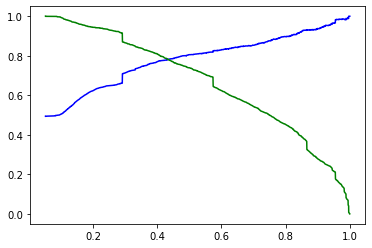

In [155]:
#let us plot the curve

plt.plot(threshold, p[:-1], "b-")
plt.plot(threshold, r[:-1], "g-")
plt.show()

From the precison-recall curve as well we could see that the optimal value of threshold is around 0.42, which same as what we have noticed in the sensitivity specificity and accuracy curve.



### Step 10. Predictions on the test set


After checking the evaluation metrices we could say that the model we have build with the selected set of 11 features and cutoff of 0.42 is pretty effective. Let us test our model on the test set to validate further.

In [166]:
#Here are our selected features, lets create a list for those cols

feat=X_train_rfe.columns

feat

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [167]:
X_test_rfe = X_test[feat]

In [170]:
X_test_rfe.shape

(1912, 11)

In [169]:
X_test_rfe.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_Unreachable
4771,0.000000,0.000000,1,0,0,0,0,1,0,0,0
6122,0.027888,0.029049,0,0,0,0,0,0,0,1,0
9202,0.015936,0.416813,0,0,0,0,0,1,0,1,0
6570,0.011952,0.378961,0,0,0,1,0,1,0,1,0
2668,0.031873,0.395246,0,0,0,0,0,1,0,1,0


In [172]:
#The test set has already been scaled for the numeric features

X_test_rfe.describe()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_Unreachable
count,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000
mean,0.014232,0.238254,0.084205,0.141736,0.017782,0.067992,0.003138,0.354079,0.033473,0.852510,0.003138
std,0.015770,0.249417,0.277768,0.348871,0.132194,0.251797,0.055945,0.478359,0.179915,0.354686,0.055945
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.007968,0.016285,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.011952,0.128961,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.019920,0.453455,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,0.294821,0.991637,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [173]:
#Before making predictions, let us add constant to the dataset

X_test_sm=sm.add_constant(X_test_rfe)

X_test_sm.head()

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_Unreachable
4771,1.0,0.000000,0.000000,1,0,0,0,0,1,0,0,0
6122,1.0,0.027888,0.029049,0,0,0,0,0,0,0,1,0
9202,1.0,0.015936,0.416813,0,0,0,0,0,1,0,1,0
6570,1.0,0.011952,0.378961,0,0,0,1,0,1,0,1,0
2668,1.0,0.031873,0.395246,0,0,0,0,0,1,0,1,0


In [175]:
#now that our test set is ready, let us make the predictions on the test set

y_test_pred = res.predict(X_test_sm)

y_test_pred.head()

4771    0.996296
6122    0.129992
9202    0.703937
6570    0.299564
2668    0.720796
dtype: float64

In [176]:
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:10]

array([0.99629645, 0.1299922 , 0.70393736, 0.29956437, 0.72079633,
       0.79224969, 0.70403785, 0.46452125, 0.28297794, 0.78645961])

In [177]:
y_test.head()

4771    1
6122    0
9202    0
6570    1
2668    1
Name: Converted, dtype: int64

In [178]:
y_test_pred_final = pd.DataFrame({"Converted":y_test.values, "Conversion_Prob": y_test_pred})

y_test_pred_final.head()

,Converted,Conversion_Prob
0,1,0.996296
1,0,0.129992
2,0,0.703937
3,1,0.299564
4,1,0.720796


In [179]:
#Let us make predictions on the test set with threshold as the optimum value of 0.42

y_test_pred_final['Predicted'] = y_test_pred_final.Conversion_Prob.map(lambda x:1 if x>0.42 else 0)

y_test_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.996296,1
1,0,0.129992,0
2,0,0.703937,1
3,1,0.299564,0
4,1,0.720796,1


In [180]:
#Let us evaluate the effectiveness using the evaluation metrices


#Accuracy

metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.Predicted)

0.7845188284518828

The model gives an accuracy of 78.45% on test set, which is a good range and very comparable to the accuracy on the train set

In [181]:
#Lets create the confusion matrix

conf_test = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.Predicted)

conf_test

array([[786, 210],
       [202, 714]], dtype=int64)

In [182]:
#Let us assign the values

TN= conf_test[0,0]
FP= conf_test[0,1]
FN= conf_test[1,0]
TP= conf_test[1,1]

In [183]:
#Calculating sensitivity --> TP / (TP+FN)

TP / float(TP+FN)

0.7794759825327511

In [184]:
# Calculate specificity --> TN / (TN+FP)

TN / float(TN+FP)

0.7891566265060241

In [185]:
#Let us calculate precison and recall as well

#Precison --> TP/(TP+FP)

TP/float(TP+FP)

0.7727272727272727

In [186]:
#Recall --> TP/(TP+FN) --> same as sensitivity calculation
 
TP/float(TP+FN)


0.7794759825327511

It can be seen that the metrices, accuracy, sensitivity, specificity, precison and recall have decent and comparable values for test set as well. Also it is very similar to the values obtained for train set hence making sure that the model is overfitting the train set.

So we could say that the model created here is a reasonably effective model